In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from glob import glob
import torch
import matplotlib.image as mpimg

In [5]:
file_path = "/home/ruixuan/github/FeatureCP/pickle_result/seed_0_0.05_result.pkl"

In [6]:
with open(file_path, 'rb') as file:
    loaded_data = pickle.load(file)

loaded_data.keys()

dict_keys(['gt_den', 'pred_den', 'cp_lower', 'cp_upper', 'fcp_lower', 'fcp_upper'])

In [7]:
gt_count = []
predicted_count = []
upper_count = []
lower_count = []
pixel_coverage = []
image_coverage = []

for img_idx in list(loaded_data['gt_den'].keys()):
    gt = loaded_data['gt_den'][img_idx]
    fcp = loaded_data['fcp_upper'][img_idx] - loaded_data['fcp_lower'][img_idx]
    y_hat = loaded_data['pred_den'][img_idx]

    is_within_bounds = (gt[0].numpy() >= loaded_data['fcp_lower'][img_idx]) & (gt[0].numpy() <= loaded_data['fcp_upper'][img_idx])

    gt_count.append(gt.numpy().sum())
    predicted_count.append(np.sum(y_hat))
    upper_count.append(loaded_data['fcp_upper'][img_idx].sum())
    lower_count.append(loaded_data['fcp_lower'][img_idx].sum())
    pixel_coverage.append(is_within_bounds.sum() / is_within_bounds.size)
    image_coverage.append((lower_count <=predicted_count) & (predicted_count <= upper_count))

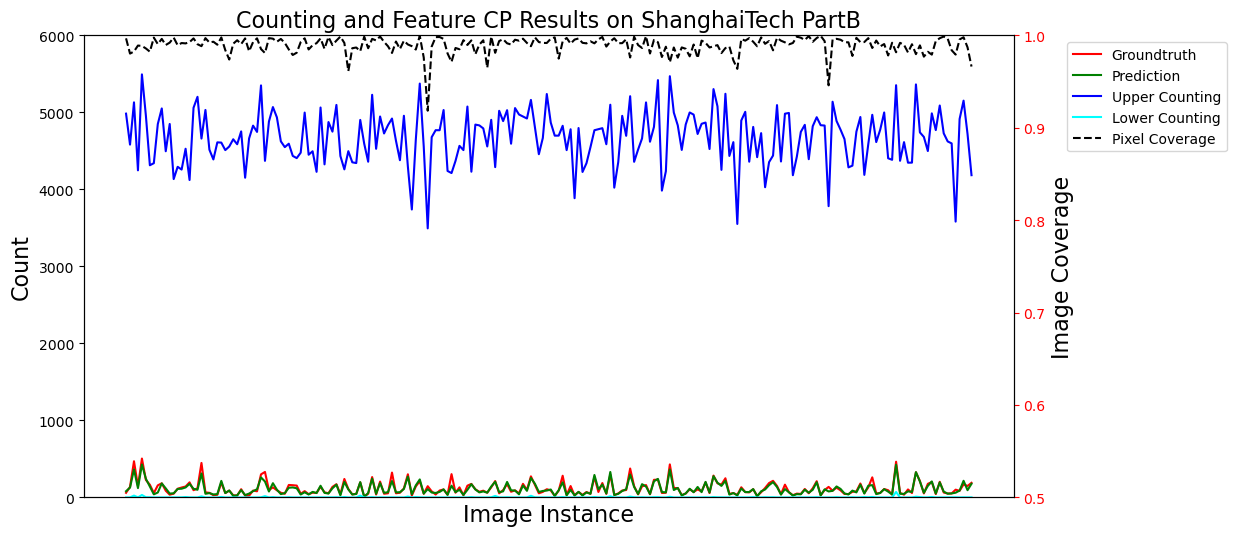

In [8]:
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(loaded_data['gt_den'].keys(), gt_count, label='Groundtruth', color='red')
ax1.plot(loaded_data['gt_den'].keys(), predicted_count, label='Prediction', color='green')
ax1.plot(loaded_data['gt_den'].keys(), upper_count, label='Upper Counting', color='blue')
ax1.plot(loaded_data['gt_den'].keys(), lower_count, label='Lower Counting', color='cyan')
ax1.set_xticks([])
ax2 = ax1.twinx()
ax2.plot(loaded_data['gt_den'].keys(), pixel_coverage, label='Pixel Coverage', color='black', linestyle='--')
ax2.set_ylim(0.5, 1)
ax1.set_ylim(0, 6000)
ax1.set_ylabel('Count', fontsize=16)
ax1.set_xlabel('Image Instance', fontsize=16)
ax2.set_ylabel('Image Coverage', fontsize=16)
ax2.tick_params(axis='y', colors='r')
plt.title('Counting and Feature CP Results on ShanghaiTech PartB', fontsize=16)
lines = ax1.get_lines() + ax2.get_lines()
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper left', bbox_to_anchor=(1.05, 1))

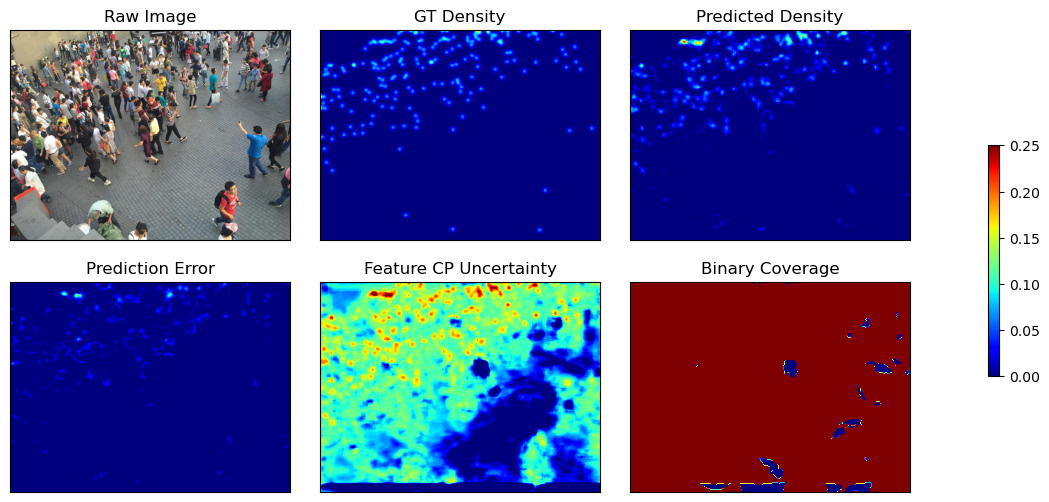

In [9]:



fig, ax = plt.subplots(2, 3, figsize=(20, 6))

vmin = 0
vmax = 0.25

image = mpimg.imread('/home/vaecount/kevinyao/data/shanghaitech/part_B/test_data/images/'+img_idx[:-4]+'.jpg')

raw = ax[0,0].imshow(image)
ax[0,0].set_title('Raw Image')
# Plot the first heatmap
heatmap1 = ax[0,1].imshow(gt[0], cmap='jet', vmin=vmin, vmax=vmax)
ax[0,1].set_title('GT Density')

# Plot the second heatmap
heatmap2 = ax[0,2].imshow(y_hat[0], cmap='jet', vmin=vmin, vmax=vmax)
ax[0,2].set_title('Predicted Density')

heatmap3 = ax[1,0].imshow(y_hat[0] - gt[0].numpy(), cmap='jet', vmin=vmin, vmax=vmax)
ax[1,0].set_title('Prediction Error')

heatmap4 = ax[1,1].imshow(abs(fcp), cmap='jet', vmin=vmin, vmax=vmax)
ax[1,1].set_title('Feature CP Uncertainty')

heatmap4 = ax[1,2].imshow((gt[0].numpy() >= loaded_data['fcp_lower'][img_idx]) & (gt[0].numpy() <= loaded_data['fcp_upper'][img_idx]), cmap='jet', vmin=vmin, vmax=vmax)
ax[1,2].set_title('Binary Coverage')

# plt.subplots_adjust(top=1, bottom=0, left=0, right=1, hspace=0, wspace=0)
plt.margins(0, 0)
plt.subplots_adjust(wspace=-0.5)
plt.subplots_adjust(hspace=0.2)
ax[0,0].set_xticks([])
ax[0,0].set_yticks([])
ax[0,1].set_xticks([])
ax[0,1].set_yticks([])
ax[0,2].set_xticks([])
ax[0,2].set_yticks([])
ax[1,0].set_xticks([])
ax[1,0].set_yticks([])
ax[1,1].set_xticks([])
ax[1,1].set_yticks([])
ax[1,2].set_xticks([])
ax[1,2].set_yticks([])
# Add a colorbar for each heatmap
cbar = fig.colorbar(heatmap2, ax=ax, shrink=0.5, location='right')
# plt.tight_layout()

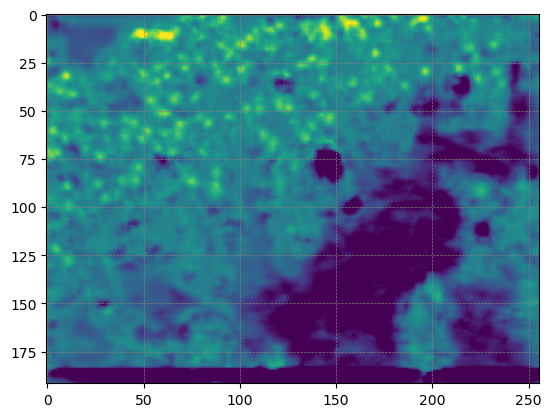

In [18]:
from google.colab.patches import cv2_imshow
plt.imshow(abs(fcp))
plt.grid(True, linestyle='--', linewidth=0.5, which='both', color='gray')